In [1]:
import numpy as np
from matplotlib import pyplot as plt
import nibabel as nib
from os import path

In [2]:
def wasserstein(mu1, var1, mu2, var2):
    return np.sqrt(
        ( mu1 - mu2 )**2 + ( np.sqrt(var1) - np.sqrt(var2) )**2
    )

def wasserstein_matrix(mu1, var1, mu2, var2):
    #print( np.trace( var1 ), np.trace( var2 ), np.trace(- 2 * np.transpose( np.transpose(var2) @ var1 @ np.transpose(var2) ) ) )
    return np.sqrt(
        np.linalg.norm( mu1.flatten() - mu2.flatten() )**2 + np.trace(
            var1 + var2 - 2 * scipy.linalg.sqrtm( scipy.linalg.sqrtm(var2) @ var1 @ scipy.linalg.sqrtm(var2) )
        )
    )

def kullback(mu0, var0, mu1, var1):
    return 0.5 * (
        var0 / var1 + (mu1 - mu0)**2 / var1 - 1 + 2 * np.log( np.sqrt(var1 / var0) )
    )

def hellinger(mu1, var1, mu2, var2):
    return 1 - np.sqrt(2 * np.sqrt(var1 * var2)) / (var1 + var2) * np.exp(
        - 0.25 * (mu1 - mu2)**2 / (var1 + var2)
    )

In [3]:
subjectPath = '../../../Data/OpenfMRI/ds000115_R2.0.0/sub-{0:02d}'
gaussianPath = subjectPath + '/func/sub-{0:02d}_task-letter{1:d}backtask_bold-{2:s}.nii'

In [4]:
subjects = np.arange(1, 102 + 1)
backtasks = np.arange(0, 2 + 1)
distanceMatrix = np.zeros((102, 102, 3))
for i,subject1 in enumerate(subjects):
    if not path.exists(subjectPath.format(subject1)):
        continue

    for j,subject2 in enumerate(subjects):
        if j < i:
            continue

        if not path.exists(subjectPath.format(subject2)):
            continue

        for backtask in backtasks:
            meanFile1 = nib.load(gaussianPath.format(subject1, backtask, 'mean'))
            varianceFile1 = nib.load(gaussianPath.format(subject1, backtask, 'variance'))

            meanFile2 = nib.load(gaussianPath.format(subject2, backtask, 'mean'))
            varianceFile2 = nib.load(gaussianPath.format(subject2, backtask, 'variance'))

            mean1 = meanFile1.get_fdata()
            variance1 = varianceFile1.get_fdata()

            mean2 = meanFile2.get_fdata()
            variance2 = varianceFile2.get_fdata()

            distances1 = kullback(mean1, variance1, mean2, variance2)
            distances2 = kullback(mean2, variance2, mean1, variance1)

            distanceMatrix[i, j, backtask] = distances1.sum()
            distanceMatrix[j, i, backtask] = distances2.sum()

            print('finished comparing {:d} with {:d}'.format(subject1, subject2))


/tmp/ipykernel_7563/1789995985.py:16: RuntimeWarning: invalid value encountered in divide
  var0 / var1 + (mu1 - mu0)**2 / var1 - 1 + 2 * np.log( np.sqrt(var1 / var0) )
/tmp/ipykernel_7563/1789995985.py:16: RuntimeWarning: divide by zero encountered in divide
  var0 / var1 + (mu1 - mu0)**2 / var1 - 1 + 2 * np.log( np.sqrt(var1 / var0) )
/tmp/ipykernel_7563/1789995985.py:16: RuntimeWarning: divide by zero encountered in log
  var0 / var1 + (mu1 - mu0)**2 / var1 - 1 + 2 * np.log( np.sqrt(var1 / var0) )
/tmp/ipykernel_7563/1789995985.py:16: RuntimeWarning: invalid value encountered in add
  var0 / var1 + (mu1 - mu0)**2 / var1 - 1 + 2 * np.log( np.sqrt(var1 / var0) )


finished comparing 1 with 1
finished comparing 1 with 1
finished comparing 1 with 1
finished comparing 1 with 2
finished comparing 1 with 2
finished comparing 1 with 2
finished comparing 1 with 3
finished comparing 1 with 3
finished comparing 1 with 3
finished comparing 1 with 4
finished comparing 1 with 4
finished comparing 1 with 4
finished comparing 1 with 5
finished comparing 1 with 5
finished comparing 1 with 5
finished comparing 1 with 6


finished comparing 1 with 6
finished comparing 1 with 6
finished comparing 1 with 7
finished comparing 1 with 7
finished comparing 1 with 7
finished comparing 1 with 8
finished comparing 1 with 8
finished comparing 1 with 8
finished comparing 1 with 9
finished comparing 1 with 9
finished comparing 1 with 9
finished comparing 1 with 10
finished comparing 1 with 10
finished comparing 1 with 10
finished comparing 1 with 11
finished comparing 1 with 11
finished comparing 1 with 11
finished comparing 1 with 12
finished comparing 1 with 12
finished comparing 1 with 12
finished comparing 1 with 13
finished comparing 1 with 13
finished comparing 1 with 13
finished comparing 1 with 14
finished comparing 1 with 14
finished comparing 1 with 14
finished comparing 1 with 15
finished comparing 1 with 15
finished comparing 1 with 15
finished comparing 1 with 16
finished comparing 1 with 16
finished comparing 1 with 16
finished comparing 1 with 17
finished comparing 1 with 17
finished comparing 1 with

In [5]:
distanceMatrixNormalized = distanceMatrix / distanceMatrix.max()

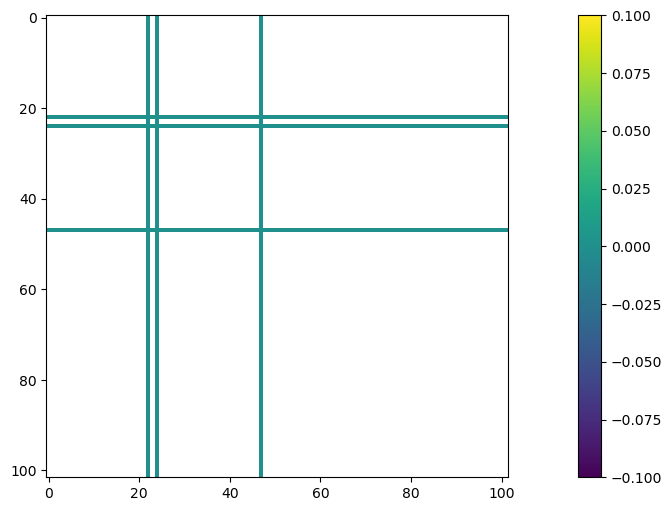

In [9]:
plt.figure(figsize=(18,6))
plt.imshow(distanceMatrix[:,:,0])
plt.colorbar()
plt.show()

In [8]:
distanceMatrix

array([[[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       ...,

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]],

       [[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        ...,
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]]